**Importing the Dependencies**

In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(0)   # Creating Reproduceable Seed
from tensorflow.keras import datasets   # Importing the Datasets
from tensorflow.keras.utils import to_categorical   # For one-hot encoding

**Image Data Preparation**

In [44]:
# Loading the datasets
# MNIST Handwritten Digits
# CIFAR-10

(x_train_digits, y_train_digits), (x_test_digits, y_test_digits) = datasets.mnist.load_data()
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = datasets.cifar10.load_data()

In [45]:
# Shape of the datasets
print(x_train_digits.shape, y_train_digits.shape, x_test_digits.shape, y_test_digits.shape)
print(x_train_cifar.shape, y_train_cifar.shape, x_test_cifar.shape, y_test_cifar.shape)
print(x_train_digits[0].shape, x_test_digits[0].shape)
print(x_train_cifar[0].shape, x_test_cifar[0].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(28, 28) (28, 28)
(32, 32, 3) (32, 32, 3)


**70,000 Grayscale Images --> MNIST Handwritten Dataset**

**60,000 RGB Images --> CIFAR-10**

In [46]:
# Create a function to convert the CIFAR to Grayscale and Resize to 28,28
def preprocess_images(images, size=(28, 28)):
    gray_images = []
    for img in images:
        # Convert RGB to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        # Resize the image
        resized = cv2.resize(gray, size)
        gray_images.append(resized)
    return np.array(gray_images)

x_train_cifar = preprocess_images(x_train_cifar)
x_test_cifar = preprocess_images(x_test_cifar)

In [47]:
# Defining the Classes
handwritten_digits = {
                        0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9'
}

cifar = {
          0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'
}

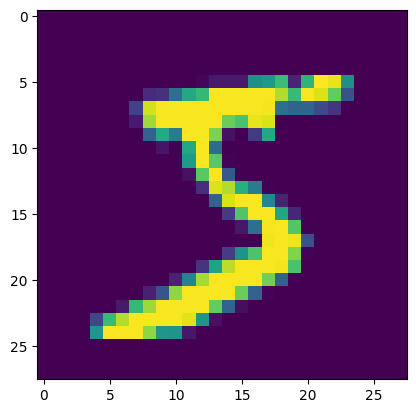

Label: 5


In [48]:
# Visualizing some samples of the datasets
plt.imshow(x_train_digits[0])
plt.show()
cv2_imshow(x_train_digits[0])
print('Label:', y_train_digits[0])

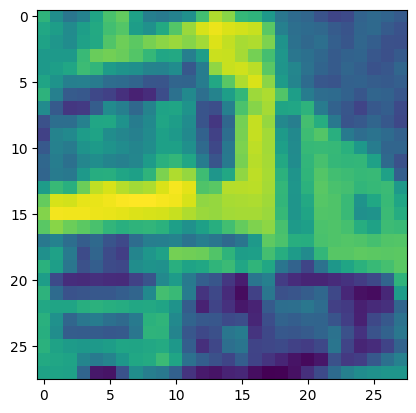

[9]
Label: truck


In [49]:
plt.imshow(x_train_cifar[1])
plt.show()
print(y_train_cifar[1])
print('Label:', cifar[9])

In [50]:
# Normalizing the dataset from 0 to 1
#Digits
x_train_digits = x_train_digits.astype('float32') / 255.0
x_test_digits = x_test_digits.astype('float32') / 255.0

#Cifar
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

In [51]:
print(x_train_digits[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [52]:
print(x_train_cifar[0])

[[0.22352941 0.16470589 0.19215687 0.25882354 0.34901962 0.42352942
  0.4509804  0.4745098  0.46666667 0.40784314 0.42745098 0.45490196
  0.43529412 0.40392157 0.43137255 0.41960785 0.4117647  0.4509804
  0.43137255 0.42745098 0.4392157  0.4862745  0.5294118  0.5372549
  0.52156866 0.52156866 0.5019608  0.49411765]
 [0.07450981 0.01568628 0.09019608 0.19607843 0.31764707 0.37254903
  0.36078432 0.35686275 0.32941177 0.3019608  0.29803923 0.32156864
  0.31764707 0.32941177 0.34509805 0.3137255  0.3254902  0.3764706
  0.37254903 0.38431373 0.36078432 0.34901962 0.38039216 0.39607844
  0.40392157 0.38039216 0.35686275 0.35686275]
 [0.09411765 0.07843138 0.19215687 0.2784314  0.34509805 0.3647059
  0.32941177 0.32156864 0.34117648 0.3372549  0.31764707 0.37254903
  0.38039216 0.3764706  0.36078432 0.34901962 0.34901962 0.37254903
  0.4        0.41960785 0.3882353  0.37254903 0.38039216 0.4
  0.40784314 0.36862746 0.35686275 0.3019608 ]
 [0.12156863 0.15294118 0.28235295 0.32156864 0.325490

In [53]:
# Checking the shape
print(x_train_digits.shape, y_train_digits.shape, x_test_digits.shape, y_test_digits.shape)
print(x_train_cifar.shape, y_train_cifar.shape, x_test_cifar.shape, y_test_cifar.shape)
print(x_train_digits[0].shape, x_test_digits[0].shape)
print(x_train_cifar[0].shape, x_test_cifar[0].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(50000, 28, 28) (50000, 1) (10000, 28, 28) (10000, 1)
(28, 28) (28, 28)
(28, 28) (28, 28)


In [54]:
# Reshaping the image datasets
#Digits
'''
x_train_digits = x_train_digits.reshape(-1, 28, 28)
x_test_digits = x_test_digits.reshape(-1, 28, 28)

#Cifar
x_train_cifar = x_train_cifar.reshape(-1, 28, 28)
x_test_cifar = x_test_cifar.reshape(-1, 28, 28)
'''

'\nx_train_digits = x_train_digits.reshape(-1, 28, 28)\nx_test_digits = x_test_digits.reshape(-1, 28, 28)\n\n#Cifar\nx_train_cifar = x_train_cifar.reshape(-1, 28, 28)\nx_test_cifar = x_test_cifar.reshape(-1, 28, 28)\n'

In [55]:
# Checking the shape again
print(x_train_digits.shape, y_train_digits.shape, x_test_digits.shape, y_test_digits.shape)
print(x_train_cifar.shape, y_train_cifar.shape, x_test_cifar.shape, y_test_cifar.shape)
print(x_train_digits[0].shape, x_test_digits[0].shape)
print(x_train_cifar[0].shape, x_test_cifar[0].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(50000, 28, 28) (50000, 1) (10000, 28, 28) (10000, 1)
(28, 28) (28, 28)
(28, 28) (28, 28)


In [56]:
# One-Hot Label Encoding
#Digits
y_train_digits = to_categorical(y_train_digits, num_classes=10)
y_test_digits = to_categorical(y_test_digits, num_classes=10)

#Cifar
y_train_cifar = to_categorical(y_train_cifar, num_classes=10)
y_test_cifar = to_categorical(y_test_cifar, num_classes=10)

In [57]:
print(y_train_digits[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [58]:
print(y_train_cifar[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [59]:
# Checking all Image Dataset Labels
print(np.unique(y_train_digits))
print(np.unique(y_train_cifar))

[0. 1.]
[0. 1.]


In [60]:
# Checking again the image dataset shape
print(x_train_digits.shape, x_test_digits.shape)
print(x_train_cifar.shape, x_test_cifar.shape)

(60000, 28, 28) (10000, 28, 28)
(50000, 28, 28) (10000, 28, 28)


# **ReLu Activation Function**

## **Training the Model using MNIST Handwritten Digits Dataset**

**Building the Model/Shallow Neural Network - Grayscale Digits - ReLu**

In [61]:
# Defining the no. of layers, neurons and activation function of each layer
model_relu_digits = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(32, activation='relu'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(64, activation='relu'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(10, activation='softmax')
])

In [62]:
# Compiling the Model - Optimizer, Loss and Evaluation Metric
model_relu_digits.compile(
                optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']
)

In [63]:
# Training the Model - Digits
history_relu_digits = model_relu_digits.fit(x_train_digits, y_train_digits, validation_split=0.1, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4424 - accuracy: 0.8630 - val_loss: 0.1556 - val_accuracy: 0.9535
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2351 - accuracy: 0.9288 - val_loss: 0.1318 - val_accuracy: 0.9585
Epoch 3/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1964 - accuracy: 0.9402 - val_loss: 0.1116 - val_accuracy: 0.9667
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1717 - accuracy: 0.9460 - val_loss: 0.1051 - val_accuracy: 0.9675
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1617 - accuracy: 0.9507 - val_loss: 0.1046 - val_accuracy: 0.9687
Epoch 6/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1497 - accuracy: 0.9530 - val_loss: 0.1083 - val_accuracy: 0.9665
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1411 - accuracy: 0.9559 - val_loss: 0.0990 - val_accuracy:

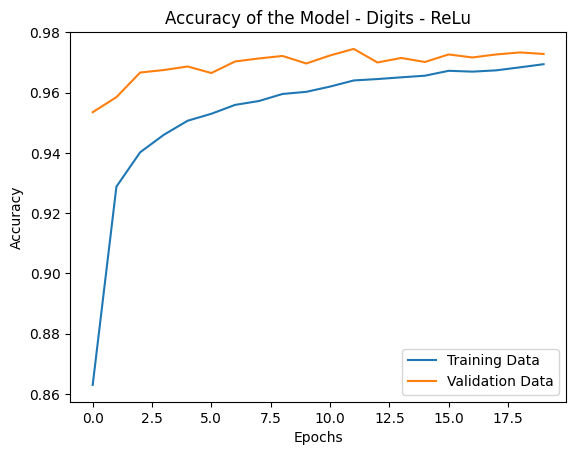

In [64]:
# Visualizing the Accuracies of the Model
relu_accuracy_digits = plt.figure()
plt.plot(history_relu_digits.history['accuracy'], label='Training Data')
plt.plot(history_relu_digits.history['val_accuracy'], label='Validation Data')
plt.title('Accuracy of the Model - Digits - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
relu_accuracy_digits.savefig('/content/ReLu Files/MNIST Digits Files/ReLu Accuracy Plot - Digits.png')

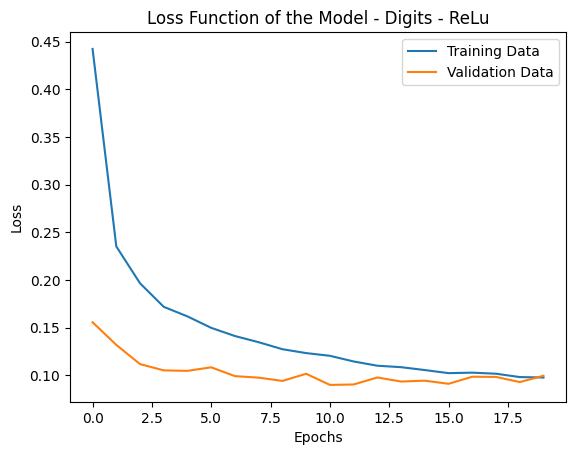

In [65]:
# Visualizing the Loss of the Model
relu_loss_digits = plt.figure()
plt.plot(history_relu_digits.history['loss'], label='Training Data')
plt.plot(history_relu_digits.history['val_loss'], label='Validation Data')
plt.title('Loss Function of the Model - Digits - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
relu_loss_digits.savefig('/content/ReLu Files/MNIST Digits Files/ReLu Loss Function Plot - Digits.png')

In [66]:
# Evaluating the Model using Test Dataset
loss_relu_digits, accuracy_relu_digits = model_relu_digits.evaluate(x_test_digits, y_test_digits)

313/313 [==============================] - 1s 2ms/step - loss: 0.1126 - accuracy: 0.9662


In [67]:
print(loss_relu_digits)
print(accuracy_relu_digits)

0.11261875927448273
0.9661999940872192


In [68]:
test_predict_relu_digits = model_relu_digits.predict(x_test_digits)

313/313 [==============================] - 1s 2ms/step


In [69]:
# Turning the encoded labels to labels 0-9
test_predict_labels_relu_digits = [np.argmax(i) for i in test_predict_relu_digits]
test_labels_relu_digits = [np.argmax(i) for i in y_test_digits]

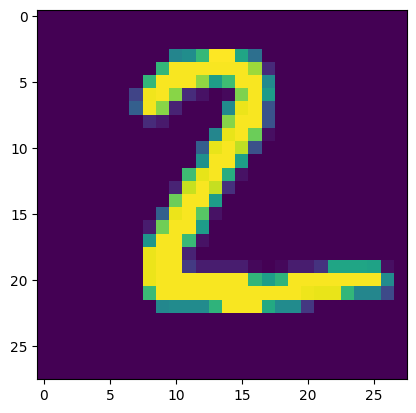

Test Label: 2
Test Predict Label: 2


In [70]:
# Checking the created labels and prediction of the model
plt.imshow(x_test_digits[1])
plt.show()
print('Test Label:', test_labels_relu_digits[1])
print('Test Predict Label:', test_predict_labels_relu_digits[1])

In [71]:
print(np.unique(test_labels_relu_digits))
print(np.unique(test_predict_labels_relu_digits))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**Evaluating the Model using Evaluation Metrics**

In [72]:
# Confusion Matrix
cf_matrix_relu_digits = confusion_matrix(test_labels_relu_digits, test_predict_labels_relu_digits)

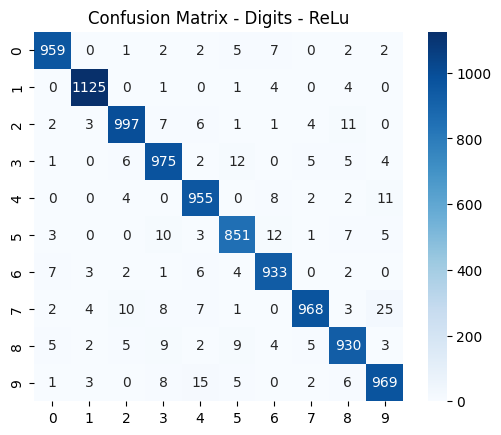

In [73]:
# Visualizing the confusion matrix
relu_digits_cfmatrix = plt.figure()
sns.heatmap(cf_matrix_relu_digits, cbar=True, square=True, fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix - Digits - ReLu')
plt.show()
relu_digits_cfmatrix.savefig('/content/ReLu Files/MNIST Digits Files/ReLu Confusion Matrix - Digits')

In [74]:
# Precision - False Positive
precision_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='macro') # Each class --> Average

0.9658532216578211

In [75]:
precision_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='micro') # As a whole

0.9662

In [76]:
# Precision - False Negative
recall_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='macro')

0.965845408669909

In [77]:
recall_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='micro')

0.9662

In [78]:
# F1 Score - Harmonic Mean
f1_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='macro')

0.9657929527631628

In [79]:
f1_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='micro')

0.9662

**SUMMARY: Digits Dataset**

**(20th Epoch)**

Accuracy: 0.9691

Validation Accuracy: 0.9733

Loss: 0.0937

Validation Loss: 0.0942

**(Test Dataset Evaluation)**

Test Accuracy: 0.9695

Test Loss: 0.1050

**(Macro - Micro Evaluation)**

Precision: 0.9692 - 0.9695

Recall: 0.9690 - 0.9695

F1 Score: 0.9691 - 0.9695

## **Training the Model using CIFAR-10 Dataset**

**Building the Model/Shallow Neural Network - Grayscale Cifar - ReLu**

In [80]:
# Defining the no. of layers, neurons and activation function of each layer
model_relu_cifar = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(32, activation='relu'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(64, activation='relu'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(10, activation='softmax')
])

In [81]:
# Compiling the Model - Optimizer, Loss and Evaluation Metric
model_relu_cifar.compile(
                optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']
)

In [82]:
# Training the Model - Cifar
history_relu_cifar = model_relu_cifar.fit(x_train_cifar, y_train_cifar, validation_split=0.1, epochs=20)

Epoch 1/20
1407/1407 [==============================] - 4s 2ms/step - loss: 2.1077 - accuracy: 0.2235 - val_loss: 1.9995 - val_accuracy: 0.2810
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 2.0057 - accuracy: 0.2749 - val_loss: 2.0137 - val_accuracy: 0.2826
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.9671 - accuracy: 0.2879 - val_loss: 1.8995 - val_accuracy: 0.3224
Epoch 4/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.9454 - accuracy: 0.2972 - val_loss: 1.8872 - val_accuracy: 0.3246
Epoch 5/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.9269 - accuracy: 0.3088 - val_loss: 1.8788 - val_accuracy: 0.3300
Epoch 6/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.9156 - accuracy: 0.3109 - val_loss: 1.8604 - val_accuracy: 0.3362
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.9062 - accuracy: 0.3154 - val_loss: 1.8514 - val_accuracy:

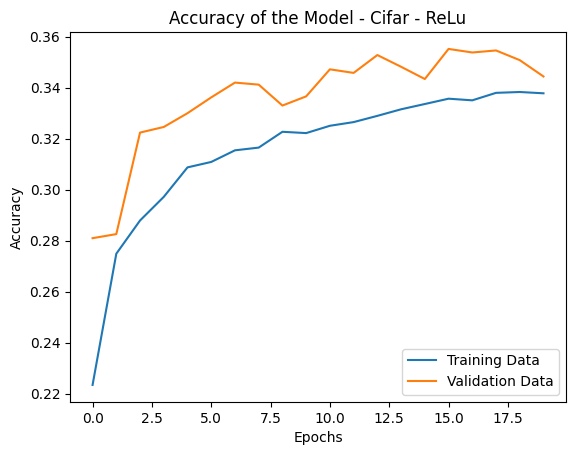

In [83]:
# Visualizing the Accuracies of the Model
relu_accuracy_cifar = plt.figure()
plt.plot(history_relu_cifar.history['accuracy'], label='Training Data')
plt.plot(history_relu_cifar.history['val_accuracy'], label='Validation Data')
plt.title('Accuracy of the Model - Cifar - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
relu_accuracy_cifar.savefig('/content/ReLu Files/CIFAR Files/ReLu Accuracy Plot - Cifar.png')

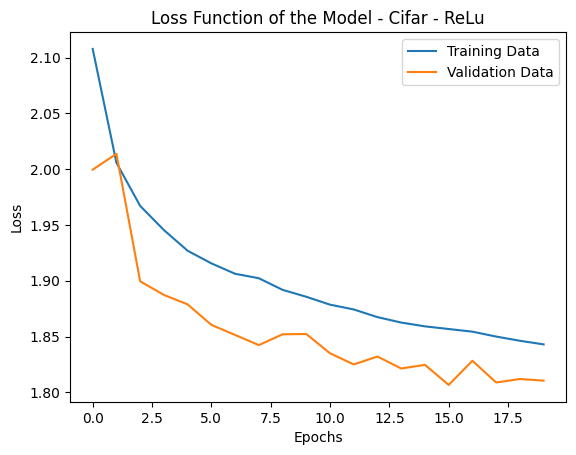

In [84]:
# Visualizing the Loss of the Model
relu_loss_cifar = plt.figure()
plt.plot(history_relu_cifar.history['loss'], label='Training Data')
plt.plot(history_relu_cifar.history['val_loss'], label='Validation Data')
plt.title('Loss Function of the Model - Cifar - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
relu_loss_cifar.savefig('/content/ReLu Files/CIFAR Files/ReLu Loss Function Plot - Cifar.png')

In [85]:
# Evaluating the Model using Test Dataset
loss_relu_cifar, accuracy_relu_cifar = model_relu_cifar.evaluate(x_test_digits, y_test_digits, verbose=2)

313/313 - 0s - loss: 3.3614 - accuracy: 0.0824 - 373ms/epoch - 1ms/step


In [86]:
print(loss_relu_cifar)
print(accuracy_relu_cifar)

3.36143159866333
0.08240000158548355


In [87]:
test_predict_relu_cifar = model_relu_cifar.predict(x_test_digits)

313/313 [==============================] - 0s 1ms/step


In [88]:
# Turning the encoded labels to labels 0-9
test_predict_labels_relu_cifar = [np.argmax(i) for i in test_predict_relu_cifar]
test_labels_relu_cifar = [np.argmax(i) for i in y_test_digits]

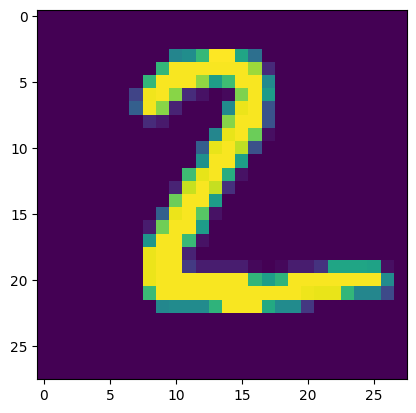

Test Label: 2
Test Predict Label: 5


In [89]:
# Checking the created labels and prediction of the model
plt.imshow(x_test_digits[1])
plt.show()
print('Test Label:', test_labels_relu_cifar[1])
print('Test Predict Label:', test_predict_labels_relu_cifar[1])

In [90]:
print(np.unique(test_labels_relu_cifar))
print(np.unique(test_predict_labels_relu_cifar))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**Evaluating the Model using Evaluation Metrics**

In [91]:
# Confusion Matrix
cf_matrix_relu_cifar = confusion_matrix(test_labels_relu_cifar, test_predict_labels_relu_cifar)

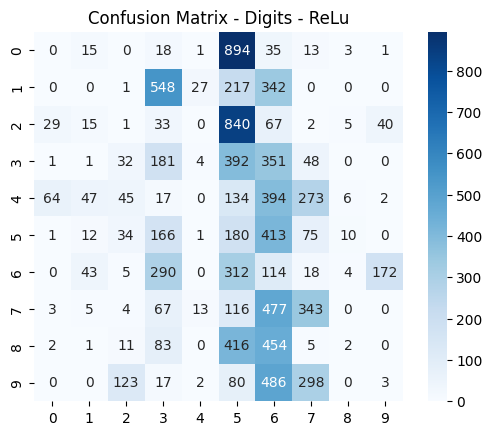

In [92]:
# Visualizing the confusion matrix
relu_cfmatrix_cifar = plt.figure()
sns.heatmap(cf_matrix_relu_cifar, cbar=True, square=True, fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix - Digits - ReLu')
plt.show()
relu_cfmatrix_cifar.savefig('/content/ReLu Files/CIFAR Files/ReLu Confusion Matrix - Cifar')

In [93]:
# Precision - False Positive
precision_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='macro') # Each class --> Average

0.06175210794210996

In [94]:
precision_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='micro') # As a whole

0.0824

In [95]:
# Precision - False Negative
recall_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='macro')

0.08396527638020576

In [96]:
recall_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='micro')

0.0824

In [97]:
# F1 Score - Harmonic Mean
f1_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='macro')

0.06218136856841229

In [98]:
f1_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='micro')

0.0824

**SUMMARY: Cifar Dataset**

**(20th Epoch)**

Accuracy: 0.9711

Validation Accuracy: 0.9735

Loss: 0.0916

Validation Loss: 0.0899

**(Test Dataset Evaluation)**

Test Accuracy: 0.9695

Test Loss: 0.1050

**(Macro - Micro Evaluation)**

Precision: 0.9692 - 0.9695

Recall: 0.9690 - 0.9695

F1 Score: 0.9691 - 0.9695